In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

     |████████████████████████████████| 244 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_excel("data.xlsx",skiprows = 2, usecols = ('B,C,G,I,W,N'))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [31]:
df.head()

,Region,Funding Stream,FY,Type,Bookable Date,FY21 Payment Amount
0,National,Corporate,2021,New,2021-04-08,5000.0
1,National,Corporate,2021,Upgrade,2020-04-13,325000.0
2,National,Corporate,2021,New,2021-04-08,105000.0
3,National,Corporate,2021,New,NaT,NaN
4,National,Corporate,2021,Upgrade,NaT,NaN


In [32]:
df = df[df["FY"] == 2021]

In [33]:
df.FY.value_counts()

2021    21673
Name: FY, dtype: int64

In [34]:
df.head()

,Region,Funding Stream,FY,Type,Bookable Date,FY21 Payment Amount
0,National,Corporate,2021,New,2021-04-08,5000.0
1,National,Corporate,2021,Upgrade,2020-04-13,325000.0
2,National,Corporate,2021,New,2021-04-08,105000.0
3,National,Corporate,2021,New,NaT,NaN
4,National,Corporate,2021,Upgrade,NaT,NaN


In [35]:
State = ['New York', 'New Jersey', 'Connecticut']
df1 = df[df['Region'].isin(State)]


In [36]:
df1.head()

,Region,Funding Stream,FY,Type,Bookable Date,FY21 Payment Amount
5808,Connecticut,Corporate,2021,Renewal,2021-01-06,5000.00
5809,Connecticut,Corporate,2021,New,2020-07-01,2310.00
5810,Connecticut,Corporate,2021,New,2021-03-02,170.23
5811,Connecticut,Corporate,2021,Renewal,2020-12-07,5000.00
5812,Connecticut,Corporate,2021,Renewal,2020-09-30,60000.00


In [37]:
df1['Bookable Date'] = pd.to_datetime(df['Bookable Date'])
df1.set_index('Bookable Date', inplace=True)
df1.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,Funding Stream,FY,Type,FY21 Payment Amount
Bookable Date,,,,,
2021-01-06,Connecticut,Corporate,2021,Renewal,5000.00
2020-07-01,Connecticut,Corporate,2021,New,2310.00
2021-03-02,Connecticut,Corporate,2021,New,170.23
2020-12-07,Connecticut,Corporate,2021,Renewal,5000.00
2020-09-30,Connecticut,Corporate,2021,Renewal,60000.00


In [83]:
df1.index = pd.to_datetime(df1.index)
df1 = df1.sort_index()

df2 = df1['2020-06-01':'2021-05-31']
len(df2.index)

1390

In [74]:
before_2021 = df1['2000-01-01':'2020-06-01']
len(before_2021.index)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


99

In [40]:
before_2021.groupby('Region')['FY21 Payment Amount'].sum()

Region
Connecticut    1234193.50
New Jersey      112051.00
New York       3521833.88
Name: FY21 Payment Amount, dtype: float64

There are 99 opportunities in total that has FY21 but the bookable date is prior to FY2021. The amount is actually quiet large.

In [75]:
before_2021['date'] = '2020-06-01'
before_2021.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,Funding Stream,FY,Type,FY21 Payment Amount,date
Bookable Date,,,,,,
2018-04-30,Connecticut,Foundation,2021,Renewal,25000.0,2020-06-01
2018-08-01,Connecticut,Individual,2021,Renewal,100000.0,2020-06-01
2018-10-31,New York,Individual,2021,Renewal,25000.0,2020-06-01
2018-11-01,New York,Individual,2021,Renewal,NaN,2020-06-01
2018-11-03,New York,Individual,2021,Renewal,NaN,2020-06-01


In [76]:
before_2021['date'] = pd.to_datetime(before_2021['date'])
before_2021 = before_2021.reset_index()
before_2021.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bookable Date,Region,Funding Stream,FY,Type,FY21 Payment Amount,date
0,2018-04-30,Connecticut,Foundation,2021,Renewal,25000.0,2020-06-01
1,2018-08-01,Connecticut,Individual,2021,Renewal,100000.0,2020-06-01
2,2018-10-31,New York,Individual,2021,Renewal,25000.0,2020-06-01
3,2018-11-01,New York,Individual,2021,Renewal,NaN,2020-06-01
4,2018-11-03,New York,Individual,2021,Renewal,NaN,2020-06-01


In [79]:
before_2021.set_index('date',inplace = True)
before_2021.head()

,Bookable Date,Region,Funding Stream,FY,Type,FY21 Payment Amount
date,,,,,,
2020-06-01,2018-04-30,Connecticut,Foundation,2021,Renewal,25000.0
2020-06-01,2018-08-01,Connecticut,Individual,2021,Renewal,100000.0
2020-06-01,2018-10-31,New York,Individual,2021,Renewal,25000.0
2020-06-01,2018-11-01,New York,Individual,2021,Renewal,NaN
2020-06-01,2018-11-03,New York,Individual,2021,Renewal,NaN


In [82]:
before_2021 =  before_2021.drop('Bookable Date', 1)
before_2021.head()

,Region,Funding Stream,FY,Type,FY21 Payment Amount
date,,,,,
2020-06-01,Connecticut,Foundation,2021,Renewal,25000.0
2020-06-01,Connecticut,Individual,2021,Renewal,100000.0
2020-06-01,New York,Individual,2021,Renewal,25000.0
2020-06-01,New York,Individual,2021,Renewal,NaN
2020-06-01,New York,Individual,2021,Renewal,NaN


In [86]:
df2 = before_2021.append(df2)


In [88]:
len(df2.index)
#df2.head()

1489

In [89]:
df2['cum_sum'] = df2['FY21 Payment Amount'].cumsum()
df2.head(20)


,Region,Funding Stream,FY,Type,FY21 Payment Amount,cum_sum
2020-06-01,Connecticut,Foundation,2021,Renewal,25000.00,25000.00
2020-06-01,Connecticut,Individual,2021,Renewal,100000.00,125000.00
2020-06-01,New York,Individual,2021,Renewal,25000.00,150000.00
2020-06-01,New York,Individual,2021,Renewal,NaN,NaN
2020-06-01,New York,Individual,2021,Renewal,NaN,NaN
2020-06-01,New York,Individual,2021,Renewal,NaN,NaN
2020-06-01,New York,Individual,2021,Renewal,1000000.00,1150000.00
2020-06-01,New York,Individual,2021,Renewal,353998.30,1503998.30
2020-06-01,New York,Individual,2021,Renewal,146001.70,1650000.00
2020-06-01,New York,Individual,2021,Renewal,250000.00,1900000.00


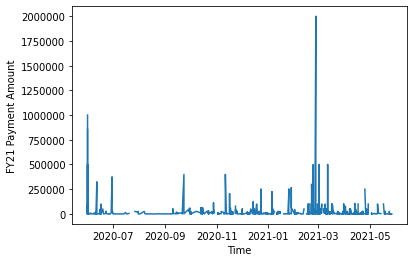

In [90]:
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('FY21 Payment Amount')
ax.plot(df2.index,df2['FY21 Payment Amount'])
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

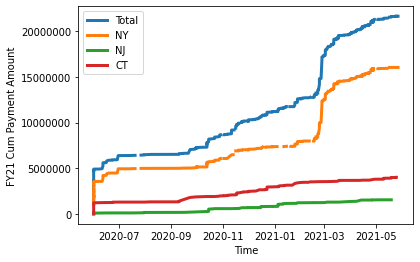

In [94]:
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('FY21 Cum Payment Amount')
ax.plot(df2.index,df2['cum_sum'], linewidth=3,label = 'Total')
ax.plot(dfny.index,dfny['cum_sum_ny'],linewidth=3,label = 'NY')
ax.plot(dfnj.index,dfnj['cum_sum_nj'],linewidth=3,label = 'NJ')
ax.plot(dfct.index,dfct['cum_sum_ct'],linewidth=3,label = 'CT')
ax.get_yaxis().get_major_formatter().set_scientific(False)
leg = plt.legend(loc='upper left')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


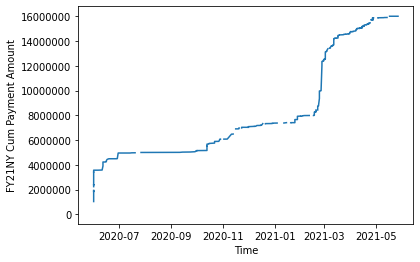

In [91]:
dfny = df2[df2['Region'] == 'New York']
dfny['cum_sum_ny'] = dfny['FY21 Payment Amount'].cumsum()
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('FY21NY Cum Payment Amount')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.plot(dfny.index,dfny['cum_sum_ny'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


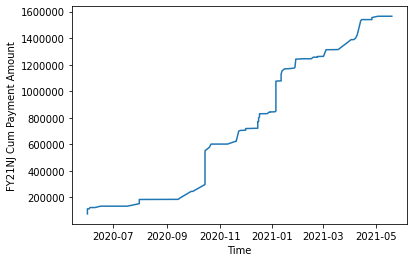

In [92]:
dfnj = df2[df2['Region'] == 'New Jersey']
dfnj['cum_sum_nj'] = dfnj['FY21 Payment Amount'].cumsum()
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('FY21NJ Cum Payment Amount')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.plot(dfnj.index,dfnj['cum_sum_nj'])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


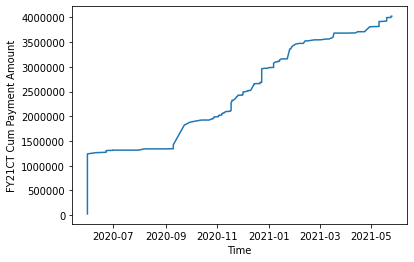

In [93]:
dfct = df2[df2['Region'] == 'Connecticut']
dfct['cum_sum_ct'] = dfct['FY21 Payment Amount'].cumsum()
fig, ax = plt.subplots()
ax.set_xlabel('Time')
ax.set_ylabel('FY21CT Cum Payment Amount')
ax.plot(dfct.index,dfct['cum_sum_ct'])
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


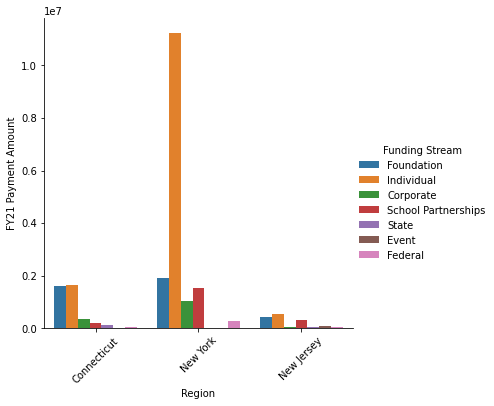

In [95]:
sns.catplot('Region','FY21 Payment Amount',data = df2,kind = 'bar',ci = None, hue = 'Funding Stream',estimator=sum)
plt.xticks(rotation=45)
plt.show()

In [97]:
df2.head()

,Region,Funding Stream,FY,Type,FY21 Payment Amount,cum_sum,cum_sum1
2020-06-01,Connecticut,Foundation,2021,Renewal,25000.0,25000.0,25000.0
2020-06-01,Connecticut,Individual,2021,Renewal,100000.0,125000.0,100000.0
2020-06-01,New York,Individual,2021,Renewal,25000.0,150000.0,125000.0
2020-06-01,New York,Individual,2021,Renewal,NaN,NaN,NaN
2020-06-01,New York,Individual,2021,Renewal,NaN,NaN,NaN


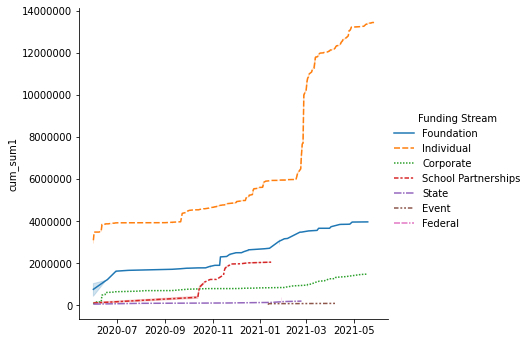

In [99]:
df2['cum_sum1'] = df2.groupby('Funding Stream')['FY21 Payment Amount'].transform(pd.Series.cumsum)
sns.relplot(df2.index,'cum_sum1',hue = 'Funding Stream',kind ='line',style = 'Funding Stream',data = df2)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


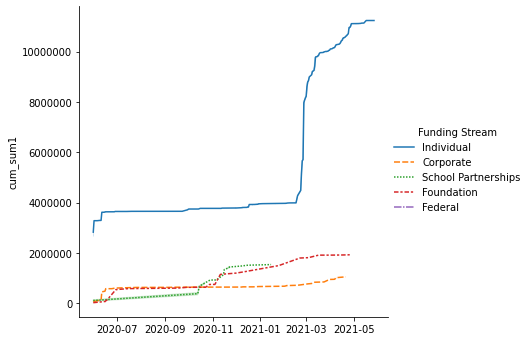

In [100]:
dfny['cum_sum1'] = dfny.groupby('Funding Stream')['FY21 Payment Amount'].transform(pd.Series.cumsum)
sns.relplot(dfny.index,'cum_sum1',hue = 'Funding Stream',kind ='line',style = 'Funding Stream',data = dfny)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


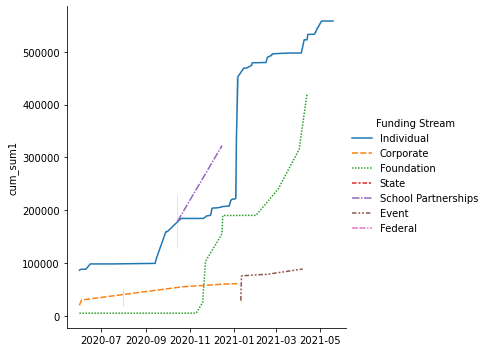

In [101]:
dfnj['cum_sum1'] = dfnj.groupby('Funding Stream')['FY21 Payment Amount'].transform(pd.Series.cumsum)
sns.relplot(dfnj.index,'cum_sum1',hue = 'Funding Stream',kind ='line',style = 'Funding Stream',data = dfnj)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


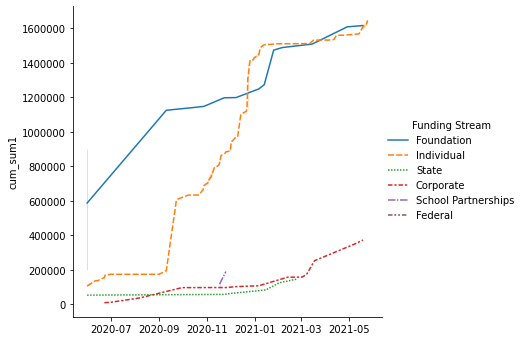

In [102]:
dfct['cum_sum1'] = dfct.groupby('Funding Stream')['FY21 Payment Amount'].transform(pd.Series.cumsum)
sns.relplot(dfct.index,'cum_sum1',hue = 'Funding Stream',style = 'Funding Stream',kind ='line',data = dfct)
plt.ticklabel_format(style='plain', axis='y')
plt.show()